# Speech Emotion Detection Using Ravdess & Tess Dataset in CNN

__DATASET:

For this Project, we have Gathered a total no of 5252 Samples.

From __RAVDESS__ we have included 1440 files containing Speech and 1012 files Containing Songs based on different human Emotions totalling to __2452__. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. and song contains calm, happy, sad, angry, and fearful emotions. Each file was rated 10 times on emotional validity, intensity, and genuineness. Ratings were provided by 247 individuals who were characteristic of untrained adult research participants from North America. A further set of 72 participants provided test-retest data. High levels of emotional validity, interrater reliability, and test-retest intrarater reliability were reported.

From __TESS__ we have __2800__ files where a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 stimuli in total. Two actresses were recruited from the Toronto area. Both actresses speak English as their first language, are university educated, and have musical training. Audiometric testing indicated that both actresses have thresholds within the normal range.

#### Importing Librosa (A Python Package) for Audio and Music analysis so we can extract audio features such as pitch, tone, amplitude etc.

In [1]:
import librosa
from librosa import display

#importing a Sample audio file from the DataSet
data, sampling_rate = librosa.load('dataset/03-01-03-01-01-01-17.wav')

#### Plotting the Imported Audio file loaded by Librosa right now using Matplotlib and waveplot function of Librosa. The Function will plot the Amplitude envelope of the waveform.

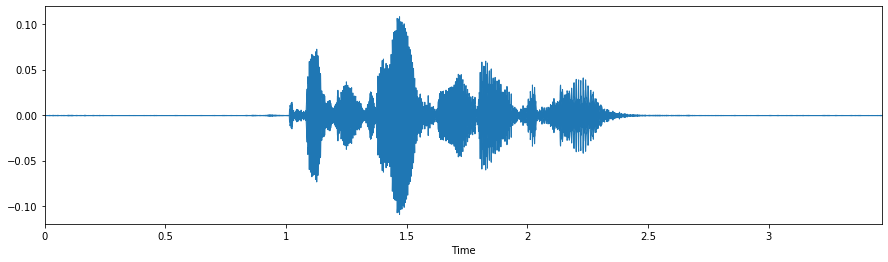

In [2]:
#Importing Matplotlib and setting matplotlib inline so the output will be visiv
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 4))
librosa.display.waveplot(data, sr=sampling_rate)

##### In the above plot you can observe that there exist a Sudden spike in the amplitude at time around 1.4 second. Similarly from 1.8 to 2.3 second there is a shaking/Disorientation in the amplitude that can be obeserved.AS the above file is of a happy sound showing such behaviour that can be observed in any Laughing/happy sound, setting the basic criteria for distinguishing various emothions.

## *Loading the DataSet
We will create our numpy array for extracting Mel-frequency cepstral coefficients (MFCCs), while the classes to predict will be extracted from the name of the file.
The following list shows the notation for each emotion in our dataset
#### 0 = neutral,
#### 1 = calm,
#### 2 = happy,
#### 3 = sad,
#### 4 = angry,
#### 5 = fearful,
#### 6 = disgust,
#### 7 = surprised


In [4]:
#Importing Numpy and Other Libraries

import numpy as np
import time
import os
path = 'dataset/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
            #Load librosa array, obtain mfcss, store the file and the mfcss information in a new array
            
            X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
            
            # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
            # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
            
            file = int(file[7:8]) - 1 
            arr = mfccs, file
            lst.append(arr)
            
            # If the file is not valid, skip it
            
        except ValueError:
            continue

print("Data loaded. Loading time: %s seconds" % (time.time() - start_time))

Data loaded. Loading time: 303.0925397872925 seconds


#### The Dataset is loaded. The timestamp above is to insure the dataset is loaded successfully & may vary everytime. Now lets Zip the X and y values so that it will make a list of first elements and 2nd Elements for future validation of our model

In [5]:
X, y = zip(*lst)

#### Now creating arrays of X and y for our impletention purpose

In [6]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)

#Lets check the shape of X and y
X.shape, y.shape

((5252, 40), (5252,))

#### As expected 5252 files with their features are loaded from the dataset
#### Now using Joblib to save files so that we won't have to perform the above Operations over and over

In [11]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'C:\\Users\\Hrishikesh\\Desktop\\Project\\#Project\\Joblib'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [12]:
# Loading saved files
import joblib
X = joblib.load('Joblib/X.joblib')
y = joblib.load('Joblib/y.joblib')

## *Decision Tree Classifier
__To Accomplish Successfull classification we are using Decision tree classifier__

In [13]:
from sklearn.model_selection import train_test_split
#creating train and test set from the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=50)

In [15]:
#Using Decision tree Classifier to train the model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

__we have trained the model using Decision-tree-Classifier. Now let's try to predict the output using test set & observe the accuracy__

In [16]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       157
           1       0.60      0.62      0.61        85
           2       0.69      0.67      0.68       206
           3       0.74      0.76      0.75       190
           4       0.72      0.69      0.70       201
           5       0.69      0.66      0.67       185
           6       0.70      0.74      0.72       134
           7       0.67      0.71      0.69       155

    accuracy                           0.71      1313
   macro avg       0.70      0.71      0.70      1313
weighted avg       0.71      0.71      0.71      1313



#### The Classification Report shows that the Precision/Accuracy is around 71%. The precision is high enough to classify as a successful model but we require more precision than this to implement it in any future Projects.

# *Neural Network
__Creating a Convolutional Neural Network Using Keras & Tensorflow to create a more efficient model__

In [17]:
#Now creating train and test set for our Neural Network
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

#Lets check the Dimensions of the train and test set
x_traincnn.shape, x_testcnn.shape

((3939, 40, 1), (1313, 40, 1))

#### As we know the Neural Network consist of Layers of Neurons (Input layers) interlinked to each other and produce final output/prediction in last layer. 
#### The Above operation is implemented in order to create a layered Neural network as the input will be in a 3 dimension.

In [23]:
#Installing Keras and Tensorflow

In [22]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [29]:
#Importing Keras and Tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

#creating a linear model using Sequential() method from Keras
model = Sequential()

#creating hidden layers for the model
model.add(Conv1D(64, 5,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

#creating a Compliler using rmsprop() to Maintain a moving average of the square of gradients
opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

__Now lets check our CNN model__

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_12 (Activation)   (None, 40, 64)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 10, 128)           41088     
_________________________________________________________________
activation_13 (Activation)   (None, 10, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 128)          

In [31]:
#Lets make our model ready for training
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [32]:
cnnmodel = model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Train on 3939 samples, validate on 1313 samples
Epoch 1/400
3939/3939 [==============================] - 3s 859us/sample - loss: 3.5501 - acc: 0.1785 - val_loss: 1.7722 - val_acc: 0.3724
Epoch 2/400
3939/3939 [==============================] - 3s 657us/sample - loss: 2.2344 - acc: 0.3178 - val_loss: 1.4752 - val_acc: 0.5438
Epoch 3/400
3939/3939 [==============================] - 3s 668us/sample - loss: 1.7761 - acc: 0.4125 - val_loss: 1.4450 - val_acc: 0.5103
Epoch 4/400
3939/3939 [==============================] - 3s 700us/sample - loss: 1.5695 - acc: 0.4735 - val_loss: 1.1565 - val_acc: 0.6070
Epoch 5/400
3939/3939 [==============================] - 3s 667us/sample - loss: 1.4172 - acc: 0.5093 - val_loss: 1.1760 - val_acc: 0.6002
Epoch 6/400
3939/3939 [==============================] - 3s 667us/sample - loss: 1.3127 - acc: 0.5390 - val_loss: 1.0519 - val_acc: 0.6222
Epoch 7/400
3939/3939 [==============================] - 3s 675us/sample - loss: 1.2497 - acc: 0.5737 - val_loss: 0.97

3939/3939 [==============================] - 3s 649us/sample - loss: 0.4146 - acc: 0.8517 - val_loss: 0.4389 - val_acc: 0.8385
Epoch 118/400
3939/3939 [==============================] - 3s 653us/sample - loss: 0.3999 - acc: 0.8520 - val_loss: 0.4615 - val_acc: 0.8347
Epoch 119/400
3939/3939 [==============================] - 3s 707us/sample - loss: 0.3960 - acc: 0.8515 - val_loss: 0.4343 - val_acc: 0.8431
Epoch 120/400
3939/3939 [==============================] - 3s 687us/sample - loss: 0.3926 - acc: 0.8563 - val_loss: 0.4427 - val_acc: 0.8401
Epoch 121/400
3939/3939 [==============================] - 3s 720us/sample - loss: 0.3850 - acc: 0.8566 - val_loss: 0.4433 - val_acc: 0.8408
Epoch 122/400
3939/3939 [==============================] - 3s 734us/sample - loss: 0.4024 - acc: 0.8515 - val_loss: 0.4359 - val_acc: 0.8401
Epoch 123/400
3939/3939 [==============================] - 3s 775us/sample - loss: 0.3858 - acc: 0.8568 - val_loss: 0.4398 - val_acc: 0.8347
Epoch 124/400
3939/3939 [==

3939/3939 [==============================] - 2s 609us/sample - loss: 0.2397 - acc: 0.9114 - val_loss: 0.3737 - val_acc: 0.8675
Epoch 234/400
3939/3939 [==============================] - 3s 643us/sample - loss: 0.2250 - acc: 0.9190 - val_loss: 0.3982 - val_acc: 0.8713
Epoch 235/400
3939/3939 [==============================] - 2s 608us/sample - loss: 0.2217 - acc: 0.9231 - val_loss: 0.3731 - val_acc: 0.8705
Epoch 236/400
3939/3939 [==============================] - 2s 616us/sample - loss: 0.2196 - acc: 0.9223 - val_loss: 0.3739 - val_acc: 0.8720
Epoch 237/400
3939/3939 [==============================] - 2s 615us/sample - loss: 0.2218 - acc: 0.9221 - val_loss: 0.3879 - val_acc: 0.8682
Epoch 238/400
3939/3939 [==============================] - 2s 623us/sample - loss: 0.2148 - acc: 0.9210 - val_loss: 0.3866 - val_acc: 0.8675
Epoch 239/400
3939/3939 [==============================] - 3s 686us/sample - loss: 0.2202 - acc: 0.9185 - val_loss: 0.3695 - val_acc: 0.8736
Epoch 240/400
3939/3939 [==

3939/3939 [==============================] - 3s 778us/sample - loss: 0.1336 - acc: 0.9568 - val_loss: 0.3947 - val_acc: 0.8766
Epoch 350/400
3939/3939 [==============================] - 3s 637us/sample - loss: 0.1291 - acc: 0.9553 - val_loss: 0.3996 - val_acc: 0.8804
Epoch 351/400
3939/3939 [==============================] - 2s 605us/sample - loss: 0.1273 - acc: 0.9556 - val_loss: 0.4104 - val_acc: 0.8766
Epoch 352/400
3939/3939 [==============================] - 2s 611us/sample - loss: 0.1282 - acc: 0.9576 - val_loss: 0.3867 - val_acc: 0.8835
Epoch 353/400
3939/3939 [==============================] - 2s 618us/sample - loss: 0.1281 - acc: 0.9535 - val_loss: 0.4247 - val_acc: 0.8644
Epoch 354/400
3939/3939 [==============================] - 3s 739us/sample - loss: 0.1379 - acc: 0.9571 - val_loss: 0.3908 - val_acc: 0.8858
Epoch 355/400
3939/3939 [==============================] - 2s 619us/sample - loss: 0.1294 - acc: 0.9553 - val_loss: 0.4018 - val_acc: 0.8804
Epoch 356/400
3939/3939 [==

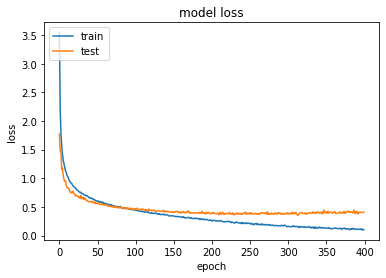

In [34]:
# Plotting model Loss 
plt.plot(cnnmodel.history['loss'])
plt.plot(cnnmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

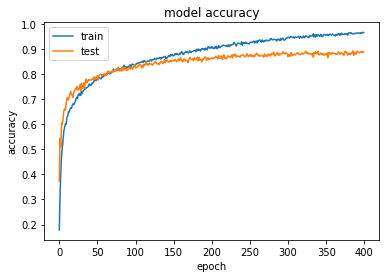

In [37]:
# Plotting model accuracy
plt.plot(cnnmodel.history['acc'])
plt.plot(cnnmodel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Now lets check the predictions vs the actual values(y_test) to check accuracy of our CNN

In [49]:
predictions = model.predict_classes(x_testcnn)
predictions

array([3, 3, 0, ..., 7, 3, 2], dtype=int64)

In [50]:
# checking against y_test so casting it to new array
cnn_Ytest = y_test.astype(int)
cnn_Ytest

array([3, 3, 1, ..., 7, 3, 2])

In [51]:
#Its time for the report of our model
from sklearn.metrics import classification_report
report = classification_report(cnn_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       157
           1       0.75      0.85      0.80        85
           2       0.93      0.84      0.89       206
           3       0.87      0.86      0.87       190
           4       0.90      0.93      0.91       201
           5       0.86      0.90      0.88       185
           6       0.86      0.87      0.87       134
           7       0.92      0.92      0.92       155

    accuracy                           0.89      1313
   macro avg       0.88      0.88      0.88      1313
weighted avg       0.89      0.89      0.89      1313



In [52]:
#Now lets plot the Confusion Matrix of our plot to display the performance of our model
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(cnn_Ytest, predictions)
print (matrix)

[[143   4   2   4   2   1   0   1]
 [  4  72   0   6   1   0   2   0]
 [  0  11 174   3   5   6   2   5]
 [  3   4   0 164   3  10   4   2]
 [  0   0   1   0 186   4   9   1]
 [  0   2   5  10   1 166   1   0]
 [  0   0   2   1   8   2 117   4]
 [  1   3   3   1   1   3   1 142]]


#### Now its time to save our model for future use

In [53]:
model.save('predict_Emotion_final_model.tf')
print('Model Saved')

Model Saved


#### Loading Our Model using different variable

In [55]:
new_model_1 = tf.keras.models.load_model('predict_Emotion_final_model.tf')
new_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_12 (Activation)   (None, 40, 64)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 10, 128)           41088     
_________________________________________________________________
activation_13 (Activation)   (None, 10, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 128)          

#### Lets check The Accuracy of Our CNN model using a test run

In [59]:
loss, acc = new_model_1.evaluate(x_testcnn, y_test)
print("Saved CNN model, accuracy: {:5.2f}%".format(100*acc))

1313/1313 [==============================] - 0s 106us/sample - loss: 0.4114 - acc: 0.8865
Saved CNN model, accuracy: 88.65%


### As Shown in the Output the accuracy of our model = 88.65%